Gonzalo Cardenal Antolín

# Tarea 2: Modelos continuos densodependientes

1. Ajustar los datos del fichero `bacterias2.txt` a un modelo densodependiente simple

2. Estudiar el comportamiento del modelo de Gompertz para el crecimiento de tumores

   $$
   \frac{dN}{dt} = -\kappa N\ln N
   $$

   En un tumor, las células que no tiene acceso a nutirntes ni a oxígen, paran de reproducirse y la mayor parte de    ellas muere, dejando una necrosis central. La ley de crecimiento de Gompertz tarta de describir este proceso de    necrosis.
   
   Leah Edelstein-Keshet (2005). _Mathematical Models in Biology._ Society for Industrial and 
   Applied Mathematics, U.S. ISBN13 9780898715545. New York, United States. Sección 6.1, páginas 2017-218. 
   Ejercicio 7, página 258

## 1. Ajuste de los datos del fichero  `bacterias2.txt` a un modelo densodependiente simple

In [240]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

In [241]:
salida = np.loadtxt('bacteria2.txt', unpack = True)
#el fichero tiene 2 columnas que se guardan en dos arrays
#unpack true convierte cada columna en un array
salida

array([[  0.        ,   0.94736842,   1.89473684,   2.84210526,
          3.78947368,   4.73684211,   5.68421053,   6.63157895,
          7.57894737,   8.52631579,   9.47368421,  10.42105263,
         11.36842105,  12.31578947,  13.26315789,  14.21052632,
         15.15789474,  16.10526316,  17.05263158,  18.        ],
       [ 10.46987406,  12.09219298,  18.45312188,  21.32167789,
         28.59841975,  35.35591803,  46.16919319,  53.84371396,
         66.03829247,  80.75349994,  94.80671559, 107.92802762,
        122.76653008, 134.02068158, 147.64696595, 157.21029687,
        169.34848575, 171.75205566, 177.6463326 , 184.02152016]])

In [242]:
ti, pob = np.loadtxt('bacteria2.txt', unpack = True) 

In [243]:
ti

array([ 0.        ,  0.94736842,  1.89473684,  2.84210526,  3.78947368,
        4.73684211,  5.68421053,  6.63157895,  7.57894737,  8.52631579,
        9.47368421, 10.42105263, 11.36842105, 12.31578947, 13.26315789,
       14.21052632, 15.15789474, 16.10526316, 17.05263158, 18.        ])

In [244]:
pob

array([ 10.46987406,  12.09219298,  18.45312188,  21.32167789,
        28.59841975,  35.35591803,  46.16919319,  53.84371396,
        66.03829247,  80.75349994,  94.80671559, 107.92802762,
       122.76653008, 134.02068158, 147.64696595, 157.21029687,
       169.34848575, 171.75205566, 177.6463326 , 184.02152016])

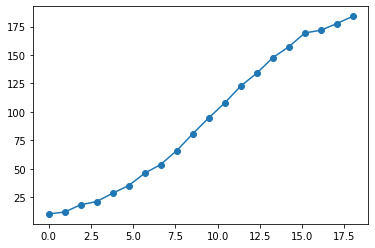

In [245]:
plt.plot(ti, pob, '-o')
plt.show()

Podemos observar como los datos experimentales representan un crecimiento bacteriano con una fase lag inicial, la exponencial hasta el final que parece estar llegando a una fase estacionaria que en el caso del modelo matemático se correspondería con la capacidad de carga máxima ($K$).

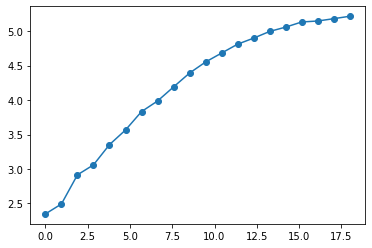

In [246]:
plt.plot(ti, np.log(pob), '-o')
plt.show()

Al realizar una representación logarítmica, en la parte de crecimiento exponencial esperamos una recta lineal. Vemos que la zona donde realmente hay un crecimiento exponencial (zona de mayor linealidad en la representación logarítmica) es entre $t=2$ y $t=10$. A partir de t=10 las bacterias ya comienzan a entrar en fase estacionaria

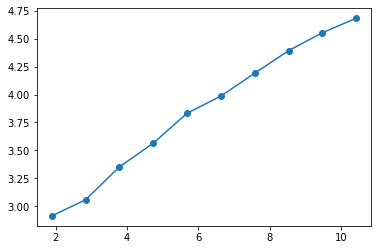

In [247]:
plt.plot(ti[2:12], np.log(pob)[2:12], '-o')
plt.show()

Franja de crecimiento exponencial

### Ajuste

Realizamos un ajuste al siguien modelo densodependiente simple:
   
   $ p(t) = \frac{K}{1 + C e^{-rt}} $ con $ C = \frac{K-p_0}{p_0} $  si  $p(0)= p_0$

In [248]:
from scipy.stats import linregress

Para el calculo de $K$, necesitamos coger 3 puntos cuya condición es que sean equidistantes en el tiempo. Para ello comprobamos que si los tiempos de los valores son equidistantes.

In [249]:
disT = []
for i in range (int(len(ti)-1)):
    R = ti[i+1]-ti[i]
    disT.append(R)
disT

Los tiempos son equidistantes en todos los valores por lo que podemos coger cualquier valor

Cálculamos la $K$ con la siguiente expresión:
$K =\frac{N_0 + N_2 - 2*N_1}{N_0N_2-N_1^{2}}$ 
   ;siendo $ N_i = \frac{1}{t' + i\tau} $ con $ i $ perteneciente {0,1,2}

In [250]:
Ksols= []

for i in range (int(len(pob)-4)):
    N0=1/pob[i]
    N1=1/pob[i+2]
    N2=1/pob[i+4] 
    K= (N0+N2-2*N1)/(N0*N2-(N1**2))
    if K > pob[-1]: #guarda la solución solo si K es mayor que la población final
        Ksols.append(['{0:.2f}'.format(K),'{0:.2f}'.format(pob[i]),'{0:.2f}'.format(pob[i+2]),'{0:.2f}'.format(pob[i+4])])

Ksols        


[['662.21', '35.36', '53.84', '80.75'],
 ['200.60', '80.75', '107.93', '134.02'],
 ['202.31', '94.81', '122.77', '147.65'],
 ['215.59', '107.93', '134.02', '157.21'],
 ['226.63', '122.77', '147.65', '169.35'],
 ['188.45', '134.02', '157.21', '171.75'],
 ['225.64', '157.21', '171.75', '184.02']]

Array con las distintas soluciones de $K$ con salto de 2 en 2. Como el último valor experimental $184.02152016$ se acerca ya a la fase estacionaria, deducimos que el sistema está cerca de su capacidad de carga máxima. Por tanto, cogemos una $K$ próxima (180-210), concretamente cogemos $200.6$

-0.29648447941631334 2.932330162025464 0.9990518540020965 1.1490458475195794e-28


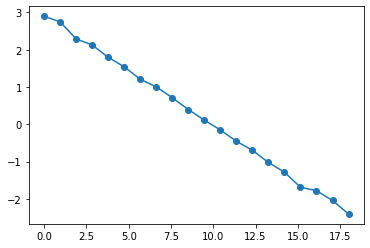

In [251]:
K = 200.60
lineal = [((K-pob[n])/(pob[n])) for n in range(len(pob-1))]
pendiente, intersección, correlación, pvalor, error_estandar = linregress(ti,np.log(lineal))
print (pendiente, intersección, correlación**2, pvalor)
plt.plot(ti, np.log(lineal), 'o-')
plt.show()

In [252]:
print (np.exp(intersección))

18.771319791883347


De esta regresión lineal obtenemos la pendiente $r$ que es negativa y $ln(C)$ que nos permite obtener $C$ elevando la $ln(C)$ a $e$.
Finalmente, el modelo densodependiente simple ajustado con estos datos queda:

$ P(t) = \frac{200.6}{1 + 18.77^{-0.296t}} $

#### Comparación

In [253]:
p_ajustemodelo = K/(1 + np.exp(intersección) * np.exp(pendiente*ti))

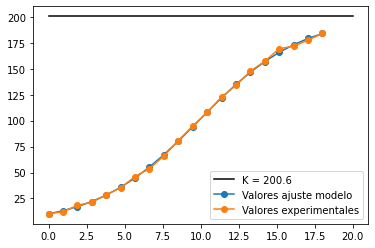

In [254]:
x=np.linspace(0 , 20 , 100)
lim = x* 0 + K
plt.plot( x , lim ,color = 'black' , label = "K = " + str(K) )
plt.plot(ti[0:20], p_ajustemodelo[0:20], '-o', label = 'Valores ajuste modelo')
plt.plot(ti[0:20], pob[0:20], '-o', label = 'Valores experimentales')
plt.legend()
plt.show()

Como observamos, el modelo densodependiente simple se ajusta de manera muy precisa a la realidad

## 2. Estudio del comportamiento del modelo de Gompertz

 $$
   \frac{dN}{dt} = -\kappa N\ln N
   $$



In [255]:
t, N0, c1, C1 = sp.symbols('t N0 c1 C1') 
K = sp.symbols('K', positive = True) #lo que sería la constante kappa
Nt = sp.symbols('Nt', positive = True)
N = sp.Function('N') #la función integrada del modelo

Introducimos la ecuación diferencial y la resolvemos

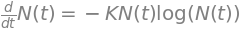

In [256]:
ed_Gom = sp.Eq(N(t).diff(), -K*N(t)*sp.log(N(t)))
ed_Gom

In [257]:
sp.dsolve(ed_Gom)

In [258]:
edo_Gom_solg = sp.dsolve(ed_Gom)
edo_Gom_solg

In [259]:
sp.simplify(edo_Gom_solg)

In [260]:
edo_Gom_solg = sp.Eq(N(t), edo_Gom_solg.rhs.subs({C1:c1})) 
edo_Gom_solg

In [261]:
ecu_ci = sp.Eq(N(t).subs(t, 0).subs(N(0), N0), edo_Gom_solg.rhs.subs(t, 0)) 
ecu_ci

In [262]:
# Obtenemos el valor de c1
cons = sp.solve(ecu_ci,c1)
cons

In [263]:
# Solución particular
edo_Gom_solp = edo_Gom_solg.subs(c1, cons[0])
edo_Gom_solp

In [264]:
# Solución con K=3 y N0=5 
solp08=sp.Eq(N(t).subs(t,0.8), edo_Gom_solp.rhs.subs({K:3, N0:5, t:0.8}))
solp08

In [265]:
# Solución con K=3 y N0=5 
solp12=sp.Eq(N(t).subs(t,1.2), edo_Gom_solp.rhs.subs({K:3, N0:5, t:1.2}))
solp12

Vemos que la población de células se acerca a 1

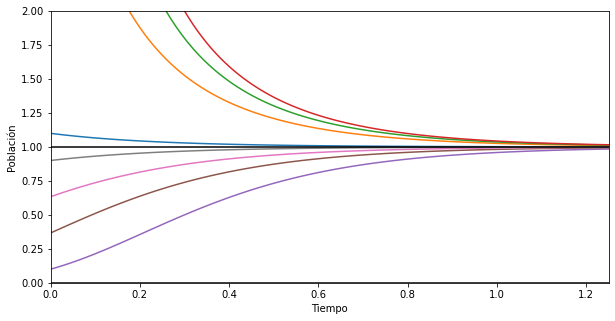

In [266]:
# Alargamos la figura para que se vean mejor de las curvas
plt.figure(figsize =(10,5))
# Generamos los valores de la variable independiente
t1 = np.linspace(0, 100, 10000)

# Construimos varios bucles para representar los diferentes comportamientos de distintas condiciones iniciales
# Representamos las soluciones entre 1.1 y 10
for ini in np.linspace(1.1, 10, 4):
    solp_l = sp.lambdify(t, edo_Gom_solp.rhs.subs({K:4, N0:ini}))
    plt.plot(t1, solp_l(t1))
# Ahora representamos las soluciones entre 0 y 0.9
for ini in np.linspace(0.1, 0.9, 4):
    solp_l = sp.lambdify(t, edo_Gom_solp.rhs.subs({K:4, N0:ini}))
    plt.plot(t1, solp_l(t1))
# Acabamos representando las soluciones constantes
for ini in [0, 1]:
    plt.plot(t1, ini*np.ones(10000), 'black')

# Título de los ejes
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.xlim(0,1.25)
plt.ylim(0,2)

plt.show()

Para una K positiva con sentido biológico como $K=4$, podemos observar que todas las funciones se acercan asintóticamente a $p^*=1$. 
Dado que la población de células tumorales naturalmente suele empezar con una única célula, las soluciones que nos interesan del modelo son (0,1). Cabe mencionar que este modelo parece simplificado y que realmente la población de células tumorales se estabilizaría en una constante que al simplificar el modelo, la solución de equilibrio da 1

### Función p.c

In [267]:
ed_Gom = sp.Eq(N(t).diff(), -K*N(t)*sp.log(N(t)))
nt_Gom= ed_Gom.subs(N(t), Nt)
nt_Gom_pc= nt_Gom.rhs / Nt
nt_Gom_pc

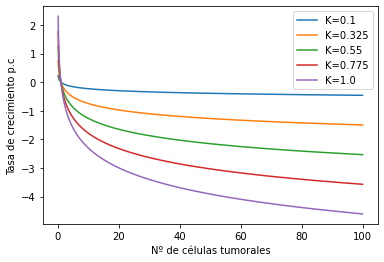

In [281]:
for K in np.linspace(0.1,1,5):
    Ncels = np.linspace(0.1,100,1000) #población
    Gom_pc = -K*np.log(Ncels) #defino la función p.c que observamos arriba
    plt.plot(Ncels, Gom_pc, label = 'K='+ str(K))
plt.xlabel('Nº de células tumorales')
plt.ylabel('Tasa de crecimiento p.c')
plt.legend()
plt.show ()

Observamos para diferentes $K$ positivas que la función p.c es una curva decreciente

### Campo de direcciones

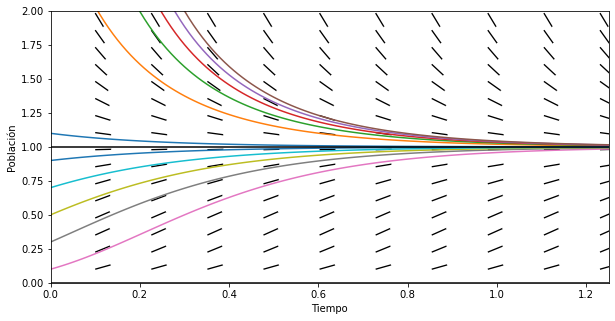

In [269]:
# Malla rectangular
R, S = np.meshgrid(np.linspace(0.1, 5, 40),  np.linspace(0.1, 5, 40))

# Componentes del vector de dirección 
# La primera componete es 1. Construimos una matriz de unos compatible con las dimensiones de P y Q
U = np.ones([40, 40])
# La segunda componente es el valor de N'(t) como función de las coordenadas t y N

F_l = sp.lambdify(N(t), ed_Gom.rhs.subs({K: 4}))
V = F_l(S)

# Hacemos el campo de vectores unitario
modulo = np.sqrt(U**2 + V**2)
D1 = U/modulo
D2 = V/modulo

# Alargamos la figura para que se vean mejor de las curvas
plt.figure(figsize =(10,5))

# Comando para dibujar campos de direcciones en el plano:
# funciones de dos variables cuyos valores son vectores de dos componentes
plt.quiver(R, S, D1, D2, angles = 'xy', scale = 25, headwidth = 0)

# Generamos los valores de la variable independiente
t1 = np.linspace(0, 100, 10000)

# Construimos varios bucles para representar los diferentes comportamientos de distintas condiciones iniciales
# Representamos las soluciones entre 1.1 y 10
for ini in np.linspace(1.1, 10, 6):
    solp_l = sp.lambdify(t, edo_Gom_solp.rhs.subs({K:4, N0:ini}))
    plt.plot(t1, solp_l(t1))
# Ahora representamos las soluciones entre 0 y 0.9
for ini in np.linspace(0.1, 0.9, 5):
    solp_l = sp.lambdify(t, edo_Gom_solp.rhs.subs({K:4, N0:ini}))
    plt.plot(t1, solp_l(t1))
# Acabamos representando las soluciones constantes
for ini in [0, 1]:
    plt.plot(t1, ini*np.ones(10000), 'black')

# Título de los ejes
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.xlim(0,1.25)
plt.ylim(0,2)

plt.show()

En el campo de direcciones quedan representados mediante vectores de longitud 1 la tasa de crecimiento del modelo $N'(t)$ para el conjunto de valores del tiempo.
Podemos ver como la tasa de crecimiento va variando asintóticamente hacia la solución $p^*=1$

## Estudio Cualitativo

#### 1. Puntos críticos del sistema

In [270]:
ed_Gom.rhs

In [271]:
ptos_criticos = sp.solve(ed_Gom.rhs, N(t))
ptos_criticos

#### 2. Estabilidad de los puntos críticos del sistema

In [272]:
pendiente_0 = ed_Gom.rhs.diff(N(t)).subs(N(t), ptos_criticos[0])
pendiente_1 = ed_Gom.rhs.diff(N(t)).subs(N(t), ptos_criticos[1])
pendiente_0, pendiente_1

Como podemos obtener de las diapositivas, en este tipo de modelos densodependientes contínuos, el punto crítico puede ser:
- Asintóticamente estable cuando $f'(p^*)<0$
- Inestable cuando $f'(p^*)>0$

Teniendo esto en cuenta y observando el valor de las derivadas en los puntos críticos, deducimos
- Para la solución trivial $p*=0$ el punto crítico es inestable. Crece hasta el infinito, la derivada va a ser siempre mayor que $0$ y por tanto todas las soluciones próximas se alejan para $t ->∞̃$
- Para la solución no trivial $p*=1$ el punto crítico es asintóticamente estable para $K$ ($\kappa$ en el enunciado) positiva. Asumimos que $K$ es una constante que tiene que ser siempre positiva para que tenga sentido biológico. Por tanto, todas las soluciones del modelo se acercan asintóticamente a este punto crítico no trivial

#### 3. Reducción de parámetros del modelo 

La estabilidad del modelo solo depende de una constante $K$ por lo que no podemos reducir más el mismo. Deducimos que el modelo ha sido previamente simplificado para su estudio.

#### Conclusiones

1. El modelo de Gompertz estudiado, es un modelo simplificado con los parámetros ya reducidos dependiendo únicamente de $K$. 
2. Interpretamos $K$ ($\kappa$) como una constante de crecimiento, en este caso celular, para que tenga sentido biológico dicha constante tiene que ser positiva
3. Hay dos puntos críticos 0 y 1.
4. El punto crítico trivial $p^*=0$ siempre es inestable ya que su $f'(0)$ da infinito.
5. El punto crítico no trivial $p^*=1$ es asintóticamente estable y hacia el que se acercan todas las soluciones para $t$ $-> ∞̃$. 
6. La solución de equilibrio es 1 porque el modelo está simplificado, las células tumorales no estabilizan su crecimiento en 1. Sin embargo, si que llegan a un capacidad de células máxima por la difusión de los nutrientes y oxígeno en el tumor. Esa constante será la simplicada del modelo y la que nos daría el nº de células tumorales máximo vivas en el tumor.